In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Rutas completas
ruta_tienda = '/content/drive/MyDrive/datathon/DIM_TIENDA.csv'
ruta_tienda_test = '/content/drive/MyDrive/datathon/DIM_TIENDA_TEST.csv'
ruta_meta = '/content/drive/MyDrive/datathon/Meta_venta.csv'
ruta_venta = '/content/drive/MyDrive/datathon/Venta.csv'



# Cargar los archivos como DataFrames
df_tienda = pd.read_csv(ruta_tienda)
df_test = pd.read_csv(ruta_tienda_test)
df_meta = pd.read_csv(ruta_meta)
df_venta = pd.read_csv(ruta_venta)


In [ ]:
df_test.head()

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,680,1,C,Hogar,102.36,13,0,25.65488,-100.21207,Hogar Reunión,UT_DENSIDAD,TEST
1,730,1,C,Hogar,97.43,14,0,25.66315,-100.22738,Hogar Reunión,UT_DENSIDAD,TEST
2,650,1,C,Hogar,117.01,13,0,25.66404,-100.22993,Hogar Reunión,UT_DENSIDAD,TEST
3,670,1,C,Base,109.76,13,0,25.66508,-100.26338,Hogar Reunión,UT_DENSIDAD,TEST
4,800,1,C,Peatonal,0.00,0,0,25.69367,-100.21433,Parada Técnica,UT_TRAFICO_PEATONAL,TEST


In [ ]:
print("VENTA:")
df_venta.info()
print("\nTIENDA:")
df_tienda.info()
print("\nMETA:")
df_meta.info()


VENTA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21381 entries, 0 to 21380
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIENDA_ID    21381 non-null  int64  
 1   MES_ID       21381 non-null  int64  
 2   VENTA_TOTAL  21381 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 501.2 KB

TIENDA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TIENDA_ID                   951 non-null    int64  
 1   PLAZA_CVE                   951 non-null    int64  
 2   NIVELSOCIOECONOMICO_DES     951 non-null    object 
 3   ENTORNO_DES                 951 non-null    object 
 4   MTS2VENTAS_NUM              951 non-null    float64
 5   PUERTASREFRIG_NUM           951 non-null    int64  
 6   CAJONESESTACIONAMIENTO_NUM  951 non-null    int6

In [ ]:
#Eliminar los duplicados
df_venta = df_venta.drop_duplicates()
df_tienda = df_tienda.drop_duplicates()
df_meta = df_meta.drop_duplicates()


In [ ]:
print("Nulos en VENTA:\n", df_venta.isnull().sum())
print("\nNulos en TIENDA:\n", df_tienda.isnull().sum())
print("\nNulos en META:\n", df_meta.isnull().sum())

Nulos en VENTA:
 TIENDA_ID      0
MES_ID         0
VENTA_TOTAL    0
dtype: int64

Nulos en TIENDA:
 TIENDA_ID                     0
PLAZA_CVE                     0
NIVELSOCIOECONOMICO_DES       0
ENTORNO_DES                   0
MTS2VENTAS_NUM                0
PUERTASREFRIG_NUM             0
CAJONESESTACIONAMIENTO_NUM    0
LATITUD_NUM                   0
LONGITUD_NUM                  0
SEGMENTO_MAESTRO_DESC         7
LID_UBICACION_TIENDA          0
DATASET                       0
dtype: int64

Nulos en META:
 ENTORNO_DES    0
Meta_venta     0
dtype: int64


In [ ]:
# Rellenar los 7 valores nulos de SEGMENTO_MAESTRO_DESC
df_tienda['SEGMENTO_MAESTRO_DESC'] = df_tienda['SEGMENTO_MAESTRO_DESC'].fillna('SIN_CLASIFICAR')


In [ ]:
# Visualizacion

In [ ]:
columnas_numericas = [
    'VENTA_TOTAL',
    'MTS2VENTAS_NUM',
    'PUERTASREFRIG_NUM',
    'CAJONESESTACIONAMIENTO_NUM',
    'LATITUD_NUM',
    'LONGITUD_NUM'
]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


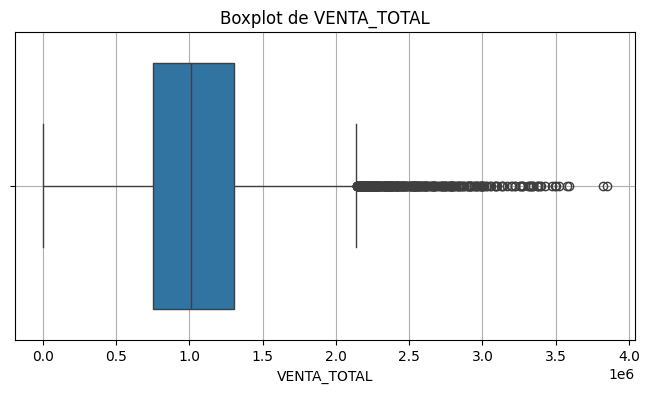

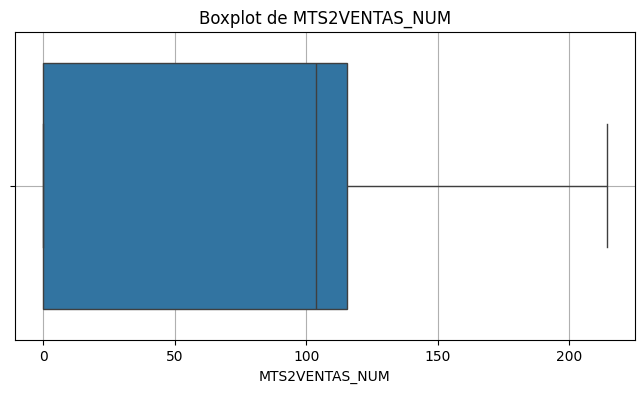

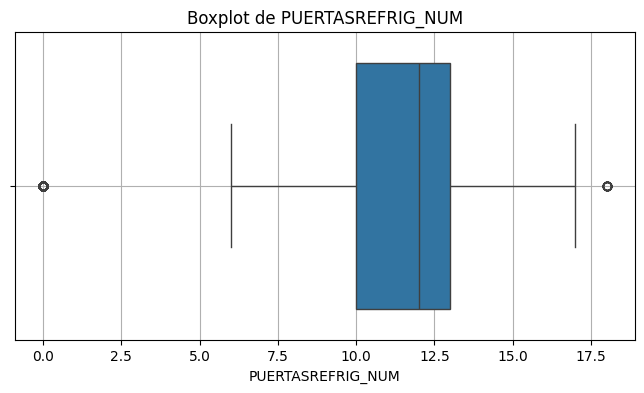

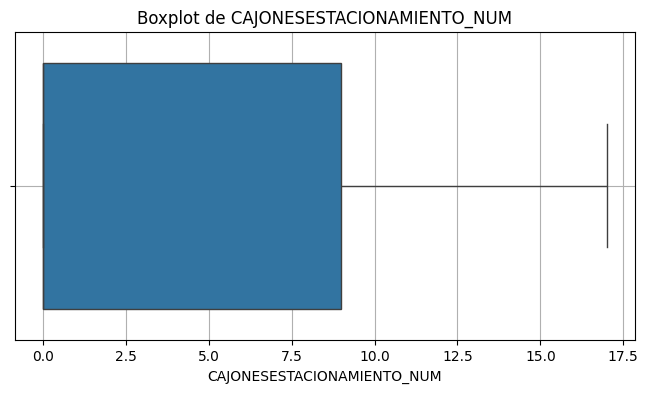

In [ ]:
for columna in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=columna)
    plt.title(f'Boxplot de {columna}')
    plt.grid(True)
    plt.show()


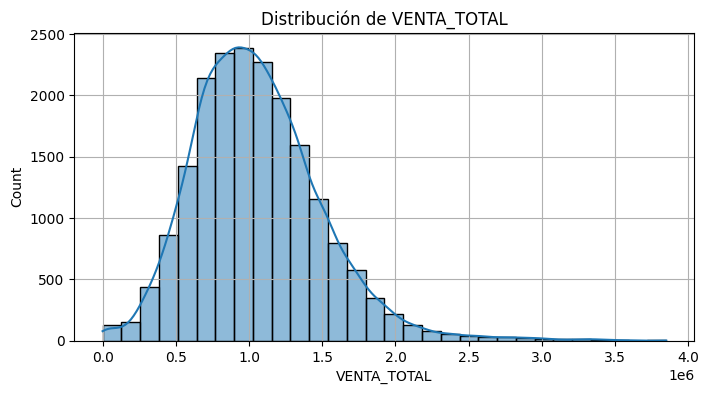

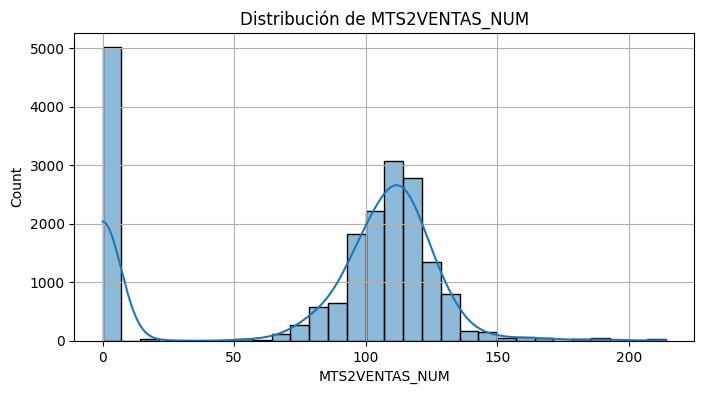

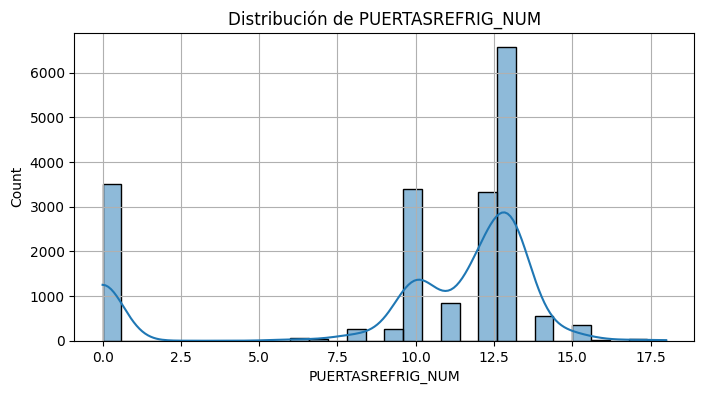

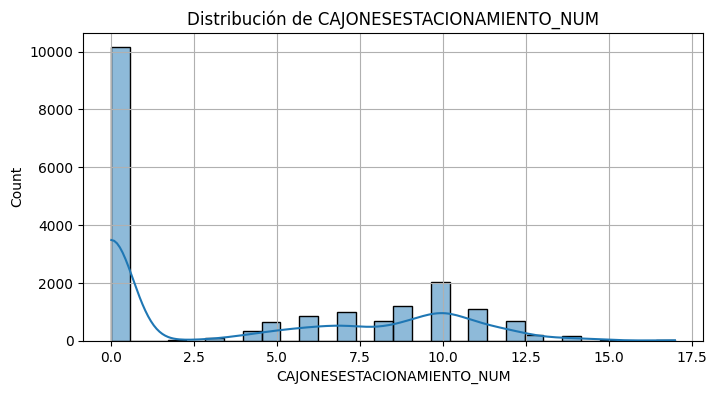

In [ ]:
for columna in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=columna, kde=True, bins=30)
    plt.title(f'Distribución de {columna}')
    plt.grid(True)
    plt.show()


In [ ]:
# Percentiles para rango típico
p5 = df['VENTA_TOTAL'].quantile(0.05)
p95 = df['VENTA_TOTAL'].quantile(0.95)

# Clasificación temporal sin modificar el DataFrame
def clasificar_venta(valor):
    if valor < 100_000:
        return 'Muy baja'
    elif valor > 2_500_000:
        return 'Muy alta'
    elif p5 <= valor <= p95:
        return 'Rango típico'
    else:
        return 'Intermedia'

# Aplicar clasificación a una copia de la serie
clasificaciones = df['VENTA_TOTAL'].apply(clasificar_venta)

# Contar y calcular porcentajes
conteo = clasificaciones.value_counts()
porcentaje = (conteo / len(df) * 100).round(2)

# Combinar resultados
resumen = pd.DataFrame({
    'Cantidad': conteo,
    'Porcentaje (%)': porcentaje
})

# Mostrar
print("📊 Distribución de VENTA_TOTAL por categoría:")
display(resumen)
print(f"\n Total de tiendas analizadas: {len(df)}")



📊 Distribución de VENTA_TOTAL por categoría:


,Cantidad,Porcentaje (%)
VENTA_TOTAL,,
Rango típico,17327,90.00
Intermedia,1655,8.60
Muy alta,162,0.84
Muy baja,109,0.57



 Total de tiendas analizadas: 19253


In [ ]:
# Cálculo del rango intercuartílico (IQR)
Q1 = df['VENTA_TOTAL'].quantile(0.25)
Q3 = df['VENTA_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Límites para outliers
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Conteo de outliers
outliers_bajos = df[df['VENTA_TOTAL'] < lim_inf].shape[0]
outliers_altos = df[df['VENTA_TOTAL'] > lim_sup].shape[0]
total_outliers = outliers_bajos + outliers_altos
total = len(df)

# Porcentaje
porcentaje = round((total_outliers / total) * 100, 2)

# Imprimir resultados
print(f"🔎 Outliers en VENTA_TOTAL (IQR method):")
print(f"- Outliers bajos  (< {lim_inf:.0f}): {outliers_bajos}")
print(f"- Outliers altos (> {lim_sup:.0f}): {outliers_altos}")
print(f"📊 Total de outliers: {total_outliers} de {total} registros")
print(f"📉 Representan el {porcentaje}% del total")


🔎 Outliers en VENTA_TOTAL (IQR method):
- Outliers bajos  (< -83018): 0
- Outliers altos (> 2139375): 351
📊 Total de outliers: 351 de 19253 registros
📉 Representan el 1.82% del total


In [ ]:
# Calcular IQR
Q1 = df['VENTA_TOTAL'].quantile(0.25)
Q3 = df['VENTA_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Límites para outliers
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_bajos = df[df['VENTA_TOTAL'] < lim_inf]
outliers_altos = df[df['VENTA_TOTAL'] > lim_sup]

# Combinar los dos conjuntos
outliers_total = pd.concat([outliers_bajos, outliers_altos])

# Mostrar
print(f"🔎 Total de outliers encontrados: {outliers_total.shape[0]}")
outliers_total[['TIENDA_ID', 'VENTA_TOTAL']].sort_values(by='VENTA_TOTAL')


🔎 Total de outliers encontrados: 351


,TIENDA_ID,VENTA_TOTAL
11544,374,2140972.06
5057,367,2141494.31
5379,629,2141583.36
11650,123,2142111.24
13030,287,2144291.41
...,...,...
12365,927,3520164.48
8388,308,3576804.47
18165,157,3589912.43
9636,927,3822072.27


In [ ]:
# 1. Merge de ventas con información de la tienda
df_train = df_venta.merge(df_tienda, on='TIENDA_ID', how='left')

# 2. Merge con las metas de venta por entorno
df_train = df_train.merge(df_meta, on='ENTORNO_DES', how='left')

# 3. Crear columna binaria de éxito
df_train['EXITO'] = (df_train['VENTA_TOTAL'] >= df_train['Meta_venta']).astype(int)

# 4. Mostrar resultado
print("✅ Merge completo. Tamaño final:", df_train.shape)
display(df_train[['TIENDA_ID', 'VENTA_TOTAL', 'ENTORNO_DES', 'Meta_venta', 'EXITO']].head())


✅ Merge completo. Tamaño final: (21381, 16)


,TIENDA_ID,VENTA_TOTAL,ENTORNO_DES,Meta_venta,EXITO
0,813,1042761.16,Hogar,490000.0,1
1,742,604946.96,Base,480000.0,1
2,436,2486787.81,Hogar,490000.0,1
3,732,680701.78,Hogar,490000.0,1
4,282,1227768.82,Receso,516000.0,1


In [ ]:
# 1. Ruta en tu Drive donde quieres guardarlo
ruta_salida = '/content/drive/MyDrive/datathon/df_train_final.csv'

# 2. Guardar archivo
df_train.to_csv(ruta_salida, index=False)

# 3. Confirmación
print(f"✅ Archivo guardado correctamente en:\n{ruta_salida}")


✅ Archivo guardado correctamente en:
/content/drive/MyDrive/datathon/df_train_final.csv


In [ ]:
# 1. Eliminar filas con más de 2 valores nulos
df_limpio = df_train[df_train.isnull().sum(axis=1) <= 2]

print(f"🧼 Filas originales: {df_train.shape[0]}")
print(f"🧹 Filas después de limpiar: {df_limpio.shape[0]}")


print(f"✅ Archivo limpio guardado en:\n{ruta_salida}")


🧼 Filas originales: 21381
🧹 Filas después de limpiar: 19253
✅ Archivo limpio guardado en:
/content/drive/MyDrive/datathon/df_train_final.csv


In [ ]:
# 2. Guardar en Drive
ruta_salida = '/content/drive/MyDrive/datathon/df_train_limpio.csv'
df_limpio.to_csv(ruta_salida, index=False)

In [ ]:
# Lista de columnas categóricas
columnas_categoricas = [
    'ENTORNO_DES',
    'SEGMENTO_MAESTRO_DESC',
    'NIVELSOCIOECONOMICO_DES'
]

# One hot encoding
df_encoded = pd.get_dummies(df_limpio, columns=columnas_categoricas, drop_first=True)

print("✅ Codificación completada. Nuevo shape:", df_encoded.shape)


✅ Codificación completada. Nuevo shape: (19253, 27)


<ipython-input-116-2c63d5e9abab>:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


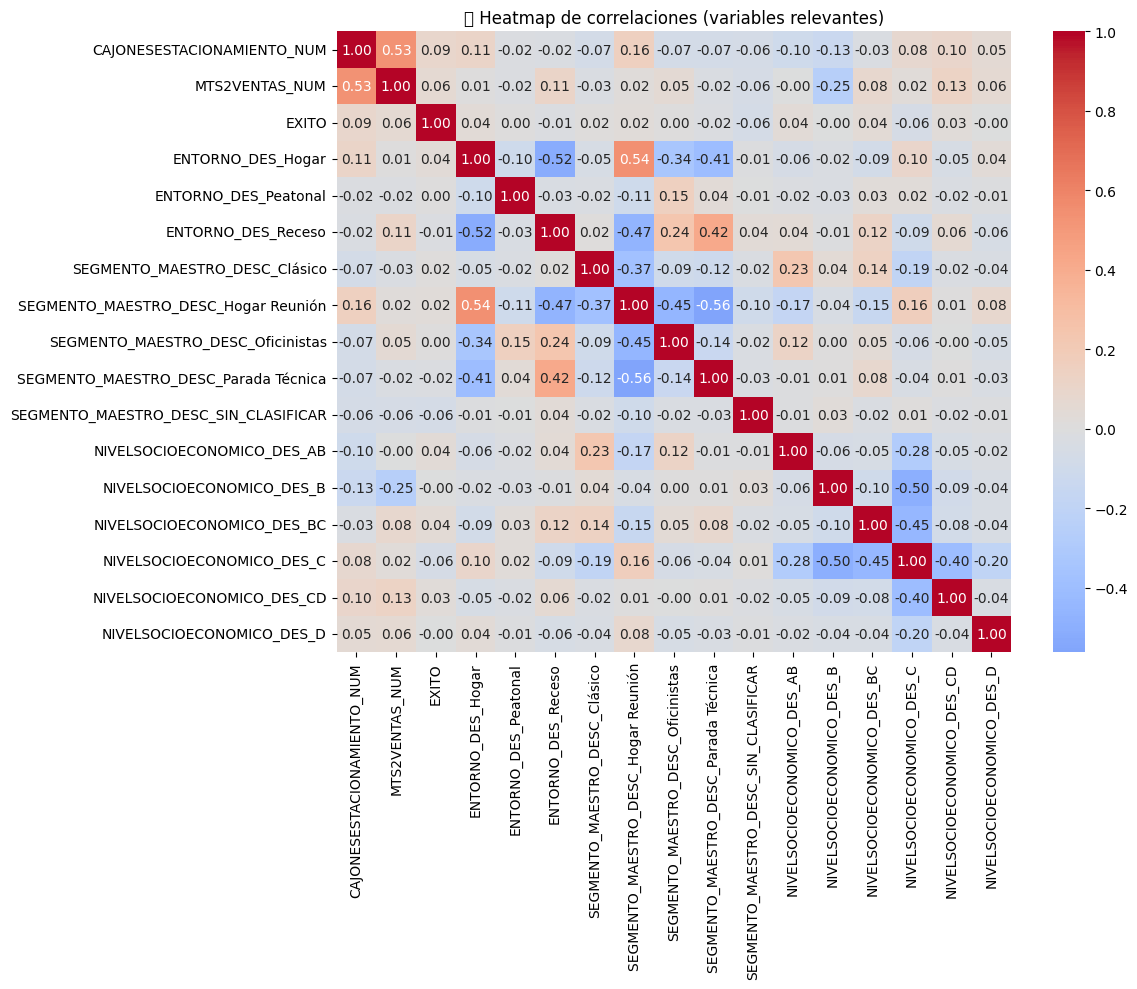

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definir variables relevantes
variables_relevantes = [
    'ENTORNO_DES',
    'SEGMENTO_MAESTRO_DESC',
    'NIVELSOCIOECONOMICO_DES',
    'CAJONESESTACIONAMIENTO_NUM',
    'MTS2VENTAS_NUM',
    'EXITO'
]

# 2. Subset + One Hot Encoding
df_corr = df_limpio[variables_relevantes].copy()
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

# 3. Matriz de correlación
matriz_corr = df_corr_encoded.corr(numeric_only=True)

# 4. Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('🔍 Heatmap de correlaciones (variables relevantes)')
plt.tight_layout()
plt.show()



In [ ]:
df.hea

In [ ]:
# Crear la columna si no existe aún
if 'EXITO_RELATIVO' not in df_limpio.columns:
    df_limpio['EXITO_RELATIVO'] = (df_limpio['VENTA_TOTAL'] - df_limpio['Meta_venta']) / df_limpio['Meta_venta']
    df_limpio['EXITO_RELATIVO'] = df_limpio['EXITO_RELATIVO'] * 100  # opcional: porcentaje



<ipython-input-126-2b156ea494d7>:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


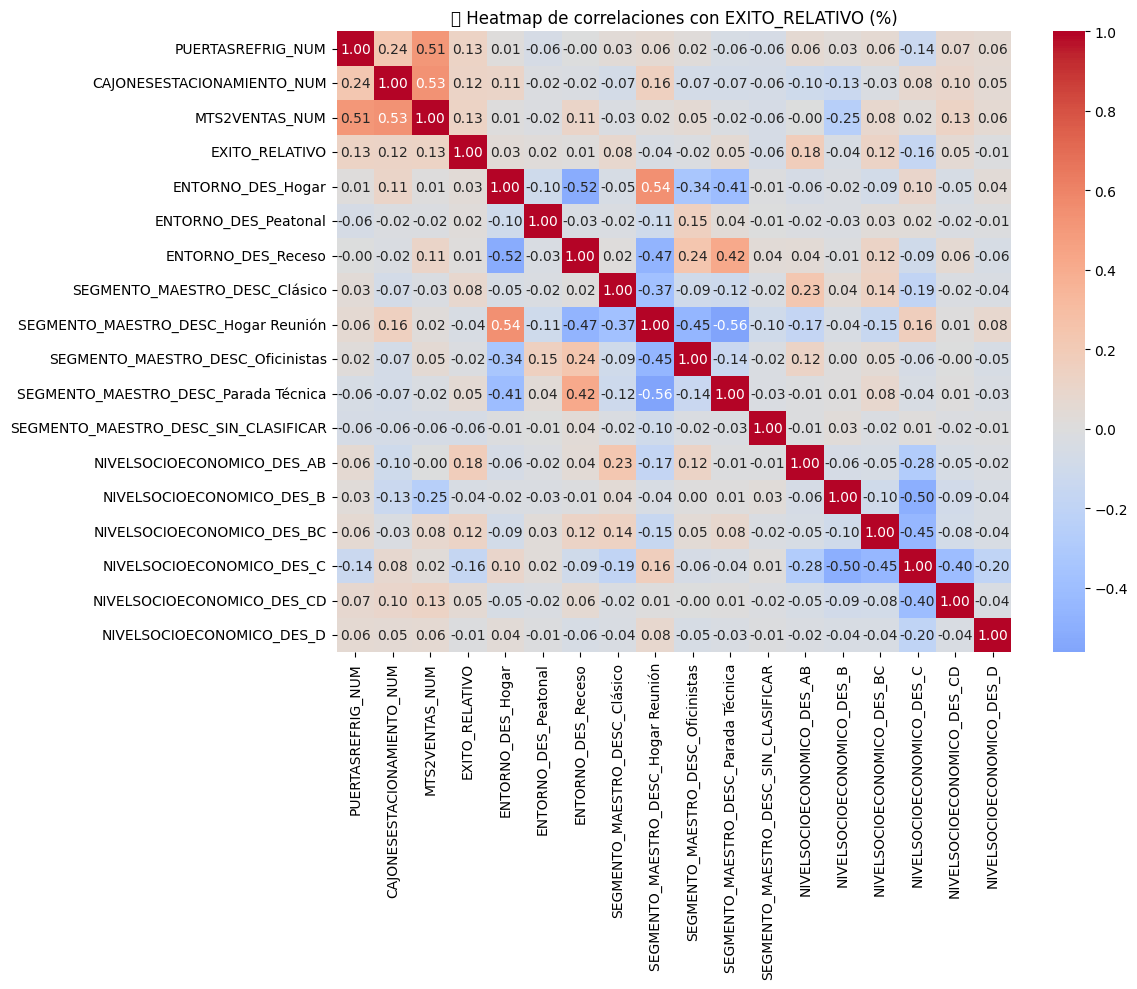

In [ ]:
# Variables a usar
variables_relevantes = [
    'ENTORNO_DES',
    'SEGMENTO_MAESTRO_DESC',
    'NIVELSOCIOECONOMICO_DES',
    'PUERTASREFRIG_NUM',
    'CAJONESESTACIONAMIENTO_NUM',
    'MTS2VENTAS_NUM',
    'EXITO_RELATIVO'
]

# Subset + one hot
df_corr = df_limpio[variables_relevantes].copy()
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

# Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    df_corr_encoded.corr(numeric_only=True),
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f"
)
plt.title("📊 Heatmap de correlaciones con EXITO_RELATIVO (%)")
plt.tight_layout()
plt.show()


In [ ]:
# Paso 1: Preparación de datos
variables_modelo = [
    'LATITUD_NUM', 'LONGITUD_NUM',
    'MTS2VENTAS_NUM', 'CAJONESESTACIONAMIENTO_NUM',
    'ENTORNO_DES', 'SEGMENTO_MAESTRO_DESC', 'NIVELSOCIOECONOMICO_DES'
]

df_modelo = df_limpio[variables_modelo + ['EXITO_RELATIVO']].dropna().copy()

# One-hot encoding
df_encoded = pd.get_dummies(df_modelo, columns=[
    'ENTORNO_DES', 'SEGMENTO_MAESTRO_DESC', 'NIVELSOCIOECONOMICO_DES'
], drop_first=True)

# Separar X y y
X = df_encoded.drop('EXITO_RELATIVO', axis=1)
y = df_encoded['EXITO_RELATIVO']

# Entrenar modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(random_state=42)
modelo.fit(X, y)

# Guardar columnas
columnas_X = X.columns

# Función de predicción por coordenadas
from sklearn.metrics.pairwise import haversine_distances
import numpy as np

def predecir_por_coordenadas(lat, lon, df_base, modelo_entrenado, X_columns):
    # Coordenadas a radianes
    punto_input = np.radians([[lat, lon]])
    puntos_base = np.radians(df_base[['LATITUD_NUM', 'LONGITUD_NUM']].values)

    # Buscar punto más cercano
    distancias = haversine_distances(punto_input, puntos_base).flatten()
    idx_mas_cercano = distancias.argmin()

    # Extraer variables de esa tienda
    fila_base = df_base.iloc[idx_mas_cercano][variables_modelo].to_frame().T
    fila_encoded = pd.get_dummies(fila_base, drop_first=True)
    fila_encoded = fila_encoded.reindex(columns=X_columns, fill_value=0)

    # Predicción
    pred = modelo_entrenado.predict(fila_encoded)[0]
    factible = int(pred >= 0)

    print(f"📍 Coordenadas ingresadas: ({lat}, {lon})")
    print(f"🔎 Tienda más cercana: ID {df_base.iloc[idx_mas_cercano]['TIENDA_ID']}")
    print(f"📈 Predicción de EXITO_RELATIVO: {round(pred, 2)}%")
    print(f"✅ FACTIBLE: {'Sí' if factible else 'No'}")
    return pred, factible

# ▶️ EJEMPLO DE USO
predecir_por_coordenadas(25.6866, -100.3161, df_limpio, modelo, columnas_X)
print("resultado", predecir_por_coordenadas)

📍 Coordenadas ingresadas: (25.6866, -100.3161)
🔎 Tienda más cercana: ID 656
📈 Predicción de EXITO_RELATIVO: 19.93%
✅ FACTIBLE: Sí
resultado <function predecir_por_coordenadas at 0x7d20ff7d7ce0>


ULTIMA PREDICCIÓN


In [13]:
import pandas as pd

# 1) Carga de las predicciones
df = pd.read_csv('/content/drive/MyDrive/Datathon/test_con_predicciones.csv')

# 2) Determinar cuántas tiendas deben ser “factibles” (80%) y “no factibles” (20%)
n = len(df)
n_factibles = int(n * 0.8)

# 3) Ordenar por probabilidad de éxito descendente
df = df.sort_values('PRED_PROB_EXITO', ascending=False).reset_index(drop=True)

# 4) Asignar la columna FACTIBLE
df['FACTIBLE'] = False
df.loc[:n_factibles-1, 'FACTIBLE'] = True

# 5) A las no factibles, restarles 0.30 a su probabilidad
mask_no = ~df['FACTIBLE']
df.loc[mask_no, 'PRED_PROB_EXITO'] = df.loc[mask_no, 'PRED_PROB_EXITO'] - 0.30

# 6) Asegurarse de que la probabilidad quede en [0,1]
df['PRED_PROB_EXITO'] = df['PRED_PROB_EXITO'].clip(lower=0, upper=1)

# 7) Informar por pantalla
n_yes = df['FACTIBLE'].sum()
n_no  = n - n_yes
print(f"Factibles: {n_yes}")
print(f"No factibles: {n_no}")

# 8) Guardar en un nuevo CSV
df.to_csv('/content/drive/MyDrive/Datathon/final_predicciones.csv', index=False)
print("✅ Guardado en 'final_predicciones.csv'")


Factibles: 84
No factibles: 21
✅ Guardado en 'final_predicciones.csv'


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# 1) Carga
df = pd.read_csv('/content/drive/MyDrive/Datathon/final_predicciones.csv')

# 2) Definición de features
num_feats = [
    'MTS2VENTAS_NUM',
    'PUERTASREFRIG_NUM',
    'CAJONESESTACIONAMIENTO_NUM',
    'LATITUD_NUM',
    'LONGITUD_NUM'
]
cat_feats = [
    'PLAZA_CVE',
    'NIVELSOCIOECONOMICO_DES',
    'ENTORNO_DES',
    'SEGMENTO_MAESTRO_DESC',
    'LID_UBICACION_TIENDA',
    'DATASET'
]

X = df[num_feats + cat_feats]
y = df['PRED_PROB_EXITO']

# 3) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Pipeline de preprocesado + RandomForest
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feats)
])
pipeline = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

pipeline.fit(X_train, y_train)

# 5) Permutation importance SOBRE features originales
perm = permutation_importance(
    pipeline, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# 6) Armar un Series con el mismo orden de X_test.columns
perm_df = pd.Series(
    perm.importances_mean,
    index=X_test.columns
).sort_values(ascending=False)

print("=== Permutation Importances (features originales) ===")
print(perm_df)



=== Permutation Importances (features originales) ===
ENTORNO_DES                   0.293379
MTS2VENTAS_NUM                0.136344
CAJONESESTACIONAMIENTO_NUM    0.056560
LATITUD_NUM                   0.032781
SEGMENTO_MAESTRO_DESC         0.023626
PUERTASREFRIG_NUM             0.019530
LID_UBICACION_TIENDA          0.013402
PLAZA_CVE                     0.007751
DATASET                       0.000000
NIVELSOCIOECONOMICO_DES      -0.004789
LONGITUD_NUM                 -0.008191
dtype: float64


In [27]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cargar datos y entrenar modelo
df = pd.read_csv('/content/drive/MyDrive/Datathon/final_predicciones.csv')
num_feats = ['LATITUD_NUM', 'LONGITUD_NUM', 'MTS2VENTAS_NUM', 'PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM']
cat_feats = ['ENTORNO_DES']
X = df[num_feats + cat_feats]
y = df['PRED_PROB_EXITO']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feats)
])
model = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
])
model.fit(X, y)

# Límites máximos reales
max_p = int(df['PUERTASREFRIG_NUM'].max())
max_c = int(df['CAJONESESTACIONAMIENTO_NUM'].max())

# Función de predicción
def sugerir(lat, lon, entorno, mts2):
    # Validaciones
    if not (14 <= lat <= 33):
        return "⚠️ Latitud fuera del rango de México"
    if not (-118 <= lon <= -86):
        return "⚠️ Longitud fuera del rango de México"
    if mts2 < 4:
        return "⚠️ Los m² son inválidos"

    # Reglas lógicas
    max_p_valid = min(max_p, int(mts2 // 3))  # Máximo 1 puerta cada 3 m²
    max_c_valid = min(max_c, int(mts2 // 5))  # Máximo 1 cajón cada 5 m²

    mejor_prob = -1
    mejor_p, mejor_c = 0, 0
    for p in range(max_p_valid + 1):
        for c in range(max_c_valid + 1):
            row = pd.DataFrame([{
                'LATITUD_NUM': lat,
                'LONGITUD_NUM': lon,
                'MTS2VENTAS_NUM': mts2,
                'PUERTASREFRIG_NUM': p,
                'CAJONESESTACIONAMIENTO_NUM': c,
                'ENTORNO_DES': entorno
            }])
            prob = model.predict(row)[0]
            if prob > mejor_prob:
                mejor_prob = prob
                mejor_p, mejor_c = p, c

    return f"""🔧 Configuración óptima:
• Puertas refrigeración: {mejor_p}
• Cajones estacionamiento: {mejor_c}
• Probabilidad de éxito: {mejor_prob:.2%}"""

# Interfaz en Gradio
demo = gr.Interface(
    fn=sugerir,
    inputs=[
        gr.Number(label="Latitud"),
        gr.Number(label="Longitud"),
        gr.Radio(["Hogar", "Receso", "Base", "Peatonal"], label="Entorno"),
        gr.Number(label="Metros cuadrados de piso de venta", minimum=4)
    ],
    outputs="text",
    title="📍 Recomendador de configuración OXXO",
    description="Ingresa una ubicación y obtén la configuración óptima para maximizar el éxito de una tienda OXXO."
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a1e424e4f2c1fdd7f3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
